In [28]:
import importlib
import datamanip
importlib.reload(datamanip)

<module 'datamanip' (namespace) from ['C:\\Users\\pavel\\PycharmProjects\\ADES-reliability\\src\\datamanip']>

In [29]:
import torch
from filepath import *
from datamanip.plots import generate_matrix, generate_metrics
from models.GAT import GAT#, GCN, SimpleMPNN
from train_eval.train import train
from train_eval.evaluate import evaluate
from datamanip.datasetmanip.three_five_dataset import ThreeFiveDataset
from datamanip.datasetmanip.dataset_util import create_loaders

# Model Selection by number of 9's
### 1. Match 1-1: 0 vs. 7
### 2. Match 2-1: 0/1 vs. 2/3
### 3. Match 2-2: 4/5 vs. 6/7
### 4. Match 3-1: 0 vs. 1
### 5. Match 3-2: 2 vs. 3
### 6. Match 3-3: 4 vs. 5
### 7. Match 3-4: 6 vs. 7



In [30]:
match = "3-4"

In [31]:
if match == "1-1":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.15
    LEARNING_RATE = 0.0008
    NODE_FEATURES = 12
    PATIENCE = 30
    HIDDEN_DIM = 128
elif match == "2-1":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.15
    LEARNING_RATE = 0.0008
    NODE_FEATURES = 12
    PATIENCE = 15
    HIDDEN_DIM = 16
elif match == "2-2":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 12
    PATIENCE = 15
    HIDDEN_DIM = 28
elif match == "3-1":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 12
    PATIENCE = 15
    HIDDEN_DIM = 82
elif match == "3-2":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0001
    NODE_FEATURES = 12
    PATIENCE = 30
    HIDDEN_DIM = 128
elif match == "3-3":
    NUM_EPOCHS = 250
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 12
    PATIENCE = 30
    HIDDEN_DIM = 64
elif match == "3-4":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.2
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 12
    PATIENCE = 20
    HIDDEN_DIM = 128
else:
    NUM_EPOCHS = 100
    DROPOUT_RATE = 0.2
    LEARNING_RATE = 0.0007
    NODE_FEATURES = 12
    PATIENCE = 15
    HIDDEN_DIM = 64

In [32]:
#Create list of Data objects, each containing the node features, edge indices, and target values
train_list = ThreeFiveDataset(root=dataset_path, match=match, test_train_val="train")
test_list = ThreeFiveDataset(root=dataset_path, match=match, test_train_val="test")
val_list = ThreeFiveDataset(root=dataset_path, match=match, test_train_val="val")

In [33]:
train_loader, val_loader, test_loader = create_loaders(train_list, val_list, test_list)

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GAT(input_dim=NODE_FEATURES, hidden_dim=HIDDEN_DIM, output_dim=2, dropout_rate=DROPOUT_RATE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = torch.nn.CrossEntropyLoss()

In [35]:
train_config = {
    "num_epochs": NUM_EPOCHS,
    "patience": PATIENCE,
    "device": device,
    "criterion": criterion,
    "optimizer": optimizer,
}

In [36]:
train(model, train_loader, val_loader, train_config, model_checkpoints_path + "/booster/" + match + ".pth")

Epoch 1/200, Train Loss: 0.3141
Epoch 1/200, Validation Loss: 0.2352
Best model updated based on validation loss.
Epoch 2/200, Train Loss: 0.2824
Epoch 2/200, Validation Loss: 0.2245
Best model updated based on validation loss.
Epoch 3/200, Train Loss: 0.2771
Epoch 3/200, Validation Loss: 0.2277
No improvement in validation loss for 1 epoch(s).
Epoch 4/200, Train Loss: 0.2712
Epoch 4/200, Validation Loss: 0.2088
Best model updated based on validation loss.
Epoch 5/200, Train Loss: 0.2727
Epoch 5/200, Validation Loss: 0.2138
No improvement in validation loss for 1 epoch(s).
Epoch 6/200, Train Loss: 0.2683
Epoch 6/200, Validation Loss: 0.2455
No improvement in validation loss for 2 epoch(s).
Epoch 7/200, Train Loss: 0.2599
Epoch 7/200, Validation Loss: 0.2248
No improvement in validation loss for 3 epoch(s).
Epoch 8/200, Train Loss: 0.2607
Epoch 8/200, Validation Loss: 0.2144
No improvement in validation loss for 4 epoch(s).
Epoch 9/200, Train Loss: 0.2635
Epoch 9/200, Validation Loss: 0

([0.31405437229194116,
  0.2824251719045775,
  0.27713258474526975,
  0.27123617655650745,
  0.272747484648409,
  0.26825983718590024,
  0.259887514175571,
  0.2607160386675438,
  0.26352551522816997,
  0.2602383640237124,
  0.2585733998743923,
  0.26108243178307106,
  0.25771783327705056,
  0.25772924542058784,
  0.25401831277338044,
  0.25542200941719934,
  0.25157794735249234,
  0.25738655544902433,
  0.2500154359988557,
  0.25061152604171305,
  0.2459478120199146,
  0.25144450491499654,
  0.24565141481974165,
  0.24902454634398902,
  0.2491461773944785,
  0.24699034727401606,
  0.24689068736600558,
  0.24495353915873816,
  0.24503811284503102,
  0.24679691910375434,
  0.23688724147998674,
  0.2436384383886486,
  0.2379405044883263,
  0.24122077318708707,
  0.23514887122543593,
  0.23898196929159216,
  0.23883086054837296,
  0.2335222890997171,
  0.23969638996364498,
  0.2280672220336167,
  0.23257495035477577,
  0.2378746536471828,
  0.23216933929520756,
  0.22921390670702257,
  0.

In [37]:
# Load the best model after training
model.load_state_dict(torch.load(model_checkpoints_path + "/booster/" + match + ".pth", weights_only=True))

<All keys matched successfully>

In [38]:
true_values, predicted_values, accuracy = evaluate(device, model, test_loader, model_checkpoints_path + "/booster/" + match + ".pth")

GAT(
  (conv1): GATConv(12, 128, heads=1)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): GATConv(128, 64, heads=1)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)
[np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Accuracy: 0.9445


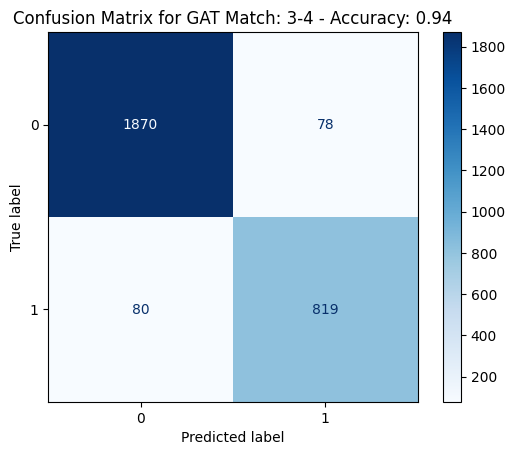

In [39]:
generate_matrix(true_values, predicted_values, accuracy, "GAT Match: "  + match)

In [40]:
generate_metrics(true_values, predicted_values, match, model_checkpoints_path, NUM_EPOCHS, LEARNING_RATE, NODE_FEATURES, DROPOUT_RATE, PATIENCE, HIDDEN_DIM)

Precision: 0.9130
Recall: 0.9110
F1 Score: 0.9120
AUROC: 0.9355
Accuracy: 0.9445
Metrics saved to C:\Users\pavel\PycharmProjects\ADES-reliability\src\..\models/booster/results/3-4.csv
